# Kaggle link
https://www.kaggle.com/datasets/clmentbisaillon/fake-and-real-news-dataset

Python with AI course
Kshitiz Regmi

In [ ]:
!gdown 19FRxWXUlm1NnjCDY8JCFfiNOwLqVMVk6

Downloading...
From: https://drive.google.com/uc?id=19FRxWXUlm1NnjCDY8JCFfiNOwLqVMVk6
To: /content/cleaned.csv
100% 79.5M/79.5M [00:00<00:00, 158MB/s]


In [ ]:
import tensorflow as tf

In [ ]:
import pandas as pd
data = pd.read_csv('cleaned.csv')

In [ ]:
data.head()

,text,target
0,politicsnews u budget fight loom republican fl...,1
1,politicsnews u military accept transgender rec...,1
2,politicsnews senior u republican senator let m...,1
3,politicsnews fbi russia probe helped australia...,1
4,politicsnews trump want postal service charge ...,1


In [ ]:
data.target = data.target.astype(int)

In [ ]:
data.shape

(44898, 2)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    data['text'], data['target'], random_state=0, stratify = data['target'])

In [ ]:
y_test

16134    1
15861    1
33936    0
7140     1
12393    1
        ..
33148    0
3410     1
732      1
4578     1
11847    1
Name: target, Length: 11225, dtype: int64

In [ ]:
y_test = y_test.values.reshape(-1,1)
y_train = y_train.values.reshape(-1,1)

In [ ]:
y_test

array([[1],
       [1],
       [0],
       ...,
       [1],
       [1],
       [1]])

In [ ]:
X_train[0]

'politicsnews u budget fight loom republican flip fiscal script washington reuters head conservative republican faction u congress voted month huge expansion national debt pay tax cut called fiscal conservative sunday urged budget restraint keeping sharp pivot way among republican u representative mark meadow speaking cbs face nation drew hard line federal spending lawmaker bracing battle january return holiday wednesday lawmaker begin trying pas federal budget fight likely linked issue immigration policy even november congressional election campaign approach republican seek keep control congress president donald trump republican want big budget increase military spending democrat also want proportional increase non defense discretionary spending program support education scientific research infrastructure public health environmental protection trump administration already willing say going increase non defense discretionary spending percent meadow chairman small influential house free

In [ ]:
import tensorflow as tf
vocab_size = 10000
max_len = 300
vectorize_layer = tf.keras.layers.TextVectorization(
 max_tokens=vocab_size, # Maximum vocab size
 output_sequence_length=max_len, # # Sequence length to pad the outputs to.
 )

vectorize_layer.adapt(X_train.values)

vectorized_train_sentences = vectorize_layer(X_train.values)
vectorized_validation_sentences = vectorize_layer(X_test.values)


In [ ]:
vectorized_train_sentences[0].shape

TensorShape([300])

In [ ]:
import tensorflow as tf

# Model Definition with LSTM
model_lstm = tf.keras.Sequential([
    tf.keras.layers.Embedding(10000, 16, input_length=300),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(24, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Set the training parameters
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [ ]:
num_epochs = 10
history = model_lstm.fit(vectorized_train_sentences, y_train, 
                         validation_split = 0.3,
                    epochs=10, 
                    batch_size = 64
                    )

Epoch 1/3
1053/1053 [==============================] - 220s 204ms/step - loss: 0.0396 - accuracy: 0.9868
Epoch 2/3
1053/1053 [==============================] - 204s 193ms/step - loss: 4.0319e-05 - accuracy: 1.0000
Epoch 3/3
1053/1053 [==============================] - 204s 194ms/step - loss: 2.3405e-05 - accuracy: 1.0000


In [ ]:
print("Accuracy of the model on Testing Data is - " , model_lstm.evaluate(vectorized_validation_sentences,y_test)[1]*100 , "%")

351/351 [==============================] - 4s 10ms/step - loss: 0.0036 - accuracy: 0.9989
Accuracy of the model on Testing Data is -  99.89309310913086 %


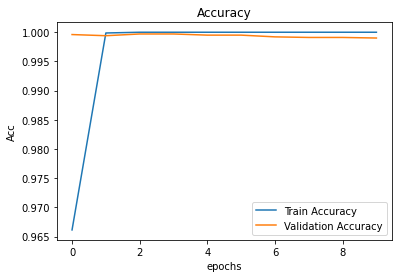

In [ ]:
import matplotlib.pyplot as plt
plt.figure()
plt.plot(history.history["accuracy"], label = "Train Accuracy")
plt.plot(history.history["val_accuracy"], label = "Validation Accuracy")
plt.title("Accuracy")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

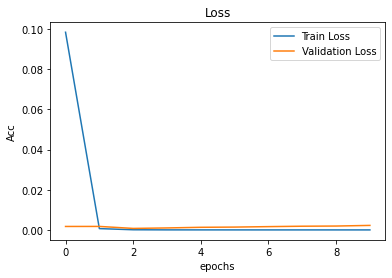

In [ ]:
plt.figure()
plt.plot(history.history["loss"], label = "Train Loss")
plt.plot(history.history["val_loss"], label = "Validation Loss")
plt.title("Loss")
plt.ylabel("Acc")
plt.xlabel("epochs")
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
# pred = model_lstm.predict(vectorized_validation_sentences)
import numpy as np
classes_x = (model_lstm.predict(vectorized_validation_sentences) > 0.5).astype("int32")
print(classification_report(y_test, classes_x))

351/351 [==============================] - 3s 10ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      5871
           1       1.00      1.00      1.00      5354

    accuracy                           1.00     11225
   macro avg       1.00      1.00      1.00     11225
weighted avg       1.00      1.00      1.00     11225

